# What affects the price of rental house in Rio de Janeiro?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm

%matplotlib inline
import warnings
warnings.simplefilter('ignore')
%config InlineBackend.figure_format='svg'

In [2]:
data=pd.read_csv('/Users/jidekickpush/Documents/GitHub/0323_2020DATAPAR/Projects/Team Project 3 - Brazil housing/Data/df_RiodeJaneiro_cleaned.csv')

In [3]:
data.head(1)

,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
0,Rio de Janeiro,72,2,1,0,7,1,0,740,1900,85,25,2750


In [4]:
data.shape

(1501, 13)

In [5]:
df=data.copy()

In [6]:
columns_to_drop=['city','hoa','property_tax','fire_insurance','total']

In [7]:
df.drop(columns_to_drop,axis=1,inplace=True)

In [8]:
df.head()

,area,rooms,bathroom,parking_spaces,floor,animal,furniture,rent_amount
0,72,2,1,0,7,1,0,1900
1,35,1,1,0,2,1,1,2300
2,88,2,3,1,9,0,1,3500
3,56,2,1,0,8,1,0,1220
4,90,3,2,1,7,1,0,1800


# Viz from Porto Alegre

In [9]:
df.corr()

,area,rooms,bathroom,parking_spaces,floor,animal,furniture,rent_amount
area,1.000000,0.718530,0.768172,0.567354,0.002195,0.051528,0.010765,0.680902
rooms,0.718530,1.000000,0.675425,0.519974,-0.021374,0.103937,-0.044278,0.562466
bathroom,0.768172,0.675425,1.000000,0.603323,0.039044,0.046362,0.027863,0.615716
parking_spaces,0.567354,0.519974,0.603323,1.000000,0.058515,0.111531,-0.026396,0.468447
floor,0.002195,-0.021374,0.039044,0.058515,1.000000,-0.050239,0.092082,0.021849
animal,0.051528,0.103937,0.046362,0.111531,-0.050239,1.000000,-0.165612,0.016524
furniture,0.010765,-0.044278,0.027863,-0.026396,0.092082,-0.165612,1.000000,0.215948
rent_amount,0.680902,0.562466,0.615716,0.468447,0.021849,0.016524,0.215948,1.000000


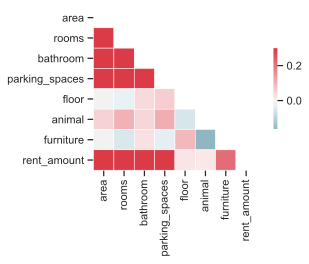

In [10]:
# your code here
from string import ascii_letters
sns.set(style="ticks")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(6, 3))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [11]:
data._get_numeric_data().columns

Index(['area', 'rooms', 'bathroom', 'parking_spaces', 'floor', 'animal',
       'furniture', 'hoa', 'rent_amount', 'property_tax', 'fire_insurance',
       'total'],
      dtype='object')

In [12]:
num_features=list(set(data._get_numeric_data().columns)-set(['rent_amount','total','property_tax','fire_insurance']))

In [13]:
len(num_features)

8

In [14]:
#fig, axes=plt.subplots(4,2,figsize=(10,12))

#for idx,feature in enumerate(num_features):
#    ax=axes[int(idx/2),idx%2]
#    sns.boxplot(x='rent_amount', y= feature, data=data, ax=ax)
#    ax.set_xlabel('')
#    ax.set_ylabel(feature)

# Modeling

In [15]:
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

In [16]:
y=df.rent_amount
X=df.drop('rent_amount',axis=1)

In [17]:
model=sm.OLS(y,add_constant(X))

In [18]:
model_fit=model.fit()

In [19]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            rent_amount   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     247.5
Date:                Fri, 01 May 2020   Prob (F-statistic):          1.94e-244
Time:                        16:10:39   Log-Likelihood:                -13468.
No. Observations:                1501   AIC:                         2.695e+04
Df Residuals:                    1493   BIC:                         2.699e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -150.1309    179.504     -0.836      0.403    -502.237     201.975
area              13.0694      0.920     14.201      0.000      11.264      14.875
rooms            315.5975     71.369      4.422      0.000     175.604     455.591
bathroom         434.1599     86.571      5.015      0.000     264.345     603.975
parking_spaces   244.9736     74.557      3.286      0.001      98.726     391.221
floor             -4.5672     12.374     -0.369      0.712     -28.839      19.704
animal            12.3983    127.015      0.098      0.922    -236.748     261.545
furniture       1358.0248    113.482     11.967      0.000    1135.423    1580.626
==============================================================================
Omnibus:                      511.623   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3231.099
Skew:                           1.442   Prob(JB):                         0.00
Kurtosis:                       9.584   Cond. No.                         581.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
def func(column,X):
    #drop the column
    if column:
        X=X.drop(column, axis=1)
    # build the model
    model=sm.OLS(y,add_constant(X))
    #fit it
    model_fit=model.fit()
    #display the model
    display(model_fit.summary())
    #return X without the column
    return X

# P-Hacking

**P-value is probability of being wrong by rejecting Null Hypothesis**.

In [22]:
droped_columns=[]

In [24]:
droped_columns.append('floor')
print(droped_columns)
X=func(droped_columns[-1],X)

['animal', 'floor']


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            rent_amount   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     346.8
Date:                Fri, 01 May 2020   Prob (F-statistic):          6.01e-247
Time:                        16:11:22   Log-Likelihood:                -13468.
No. Observations:                1501   AIC:                         2.695e+04
Df Residuals:                    1495   BIC:                         2.698e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -163.7473    135.079     -1.212      0.226    -428.712     101.217
area              13.0766      0.919     14.229      0.000      11.274      14.879
rooms            317.4538     71.046      4.468      0.000     178.093     456.814
bathroom         432.4407     86.389      5.006      0.000     262.984     601.897
parking_spaces   243.8316     74.065      3.292      0.001      98.549     389.114
furniture       1352.5963    111.632     12.117      0.000    1133.624    1571.569
==============================================================================
Omnibus:                      511.562   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3232.344
Skew:                           1.441   Prob(JB):                         0.00
Kurtosis:                       9.586   Cond. No.                         430.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
print('To optimize the model, here we removed', len(droped_columns), 'columns:', droped_columns)

To optimize the model, here we removed 2 columns: ['animal', 'floor']


In [26]:
model=sm.OLS(y,add_constant(X))
model_fit=model.fit()
model_fit.summary();

In [29]:
model_fit.save("fitted_model_RiodeJaneiro.pickle")

In [30]:
fitted_model=sm.load("fitted_model_RiodeJaneiro.pickle")
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            rent_amount   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     346.8
Date:                Fri, 01 May 2020   Prob (F-statistic):          6.01e-247
Time:                        16:11:48   Log-Likelihood:                -13468.
No. Observations:                1501   AIC:                         2.695e+04
Df Residuals:                    1495   BIC:                         2.698e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -163.7473    135.079     -1.212      0.226    -428.712     101.217
area              13.0766      0.919     14.229      0.000      11.274      14.879
rooms            317.4538     71.046      4.468      0.000     178.093     456.814
bathroom         432.4407     86.389      5.006      0.000     262.984     601.897
parking_spaces   243.8316     74.065      3.292      0.001      98.549     389.114
furniture       1352.5963    111.632     12.117      0.000    1133.624    1571.569
==============================================================================
Omnibus:                      511.562   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3232.344
Skew:                           1.441   Prob(JB):                         0.00
Kurtosis:                       9.586   Cond. No.                         430.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Now we can study our y and y_pred

In [31]:
y=data.rent_amount

In [32]:
y_pred=fitted_model.predict()

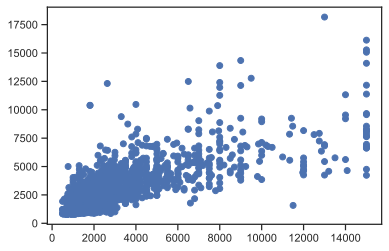

In [33]:
plt.scatter(y,y_pred)

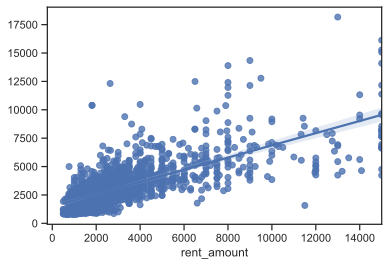

In [34]:
sns.regplot(y,y_pred)

In [35]:
(y-y_pred).mean()

4.897444161662781e-10

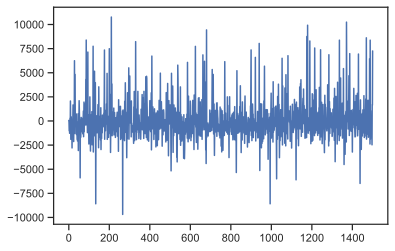

In [36]:
plt.plot(y-y_pred)

In [37]:
resid=y-y_pred

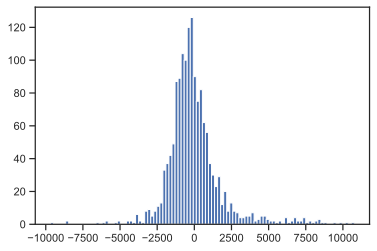

In [38]:
plt.hist(resid,bins=100);